In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint

In [2]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1 
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [3]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Compute base rate of malignant cancer (label = 0)
# Note: In sklearn, 0 = malignant, 1 = benign
malignant_count = np.sum(y == 0)
total_count = len(y)
base_rate = malignant_count / total_count

print(f"Total samples: {total_count}")
print(f"Malignant samples: {malignant_count}")
print(f"Benign samples: {total_count - malignant_count}")
print(f"Base rate of malignant cancer: {base_rate:.4f}")
print(f"Probability of malignant cancer: {base_rate*100:.2f}%")

Total samples: 569
Malignant samples: 212
Benign samples: 357
Base rate of malignant cancer: 0.3726
Probability of malignant cancer: 37.26%


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a) 
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


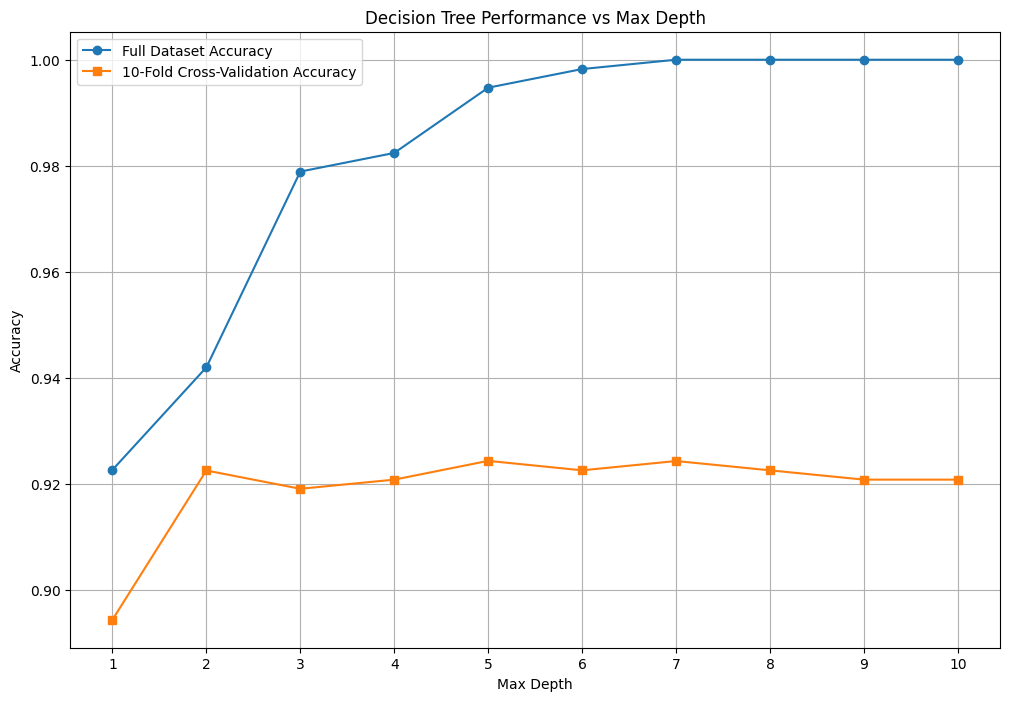

Full Dataset Scores: [0.9226713532513181, 0.9420035149384886, 0.9789103690685413, 0.9824253075571178, 0.9947275922671354, 0.9982425307557118, 1.0, 1.0, 1.0, 1.0]
Cross-Validation Scores: [np.float64(0.8944235588972431), np.float64(0.9225563909774437), np.float64(0.919110275689223), np.float64(0.9208333333333334), np.float64(0.9243734335839597), np.float64(0.9225877192982456), np.float64(0.9243421052631579), np.float64(0.9225877192982456), np.float64(0.9208333333333332), np.float64(0.9208333333333332)]


In [4]:
# Question 2a: Decision Tree with varying max_depth
max_depths = range(1, 11)
full_dataset_scores = []
cv_scores = []

for depth in max_depths:
    # Create decision tree classifier
    clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)
    
    # Full dataset accuracy (train and test on full dataset)
    clf.fit(X, y)
    full_score = clf.score(X, y)
    full_dataset_scores.append(full_score)
    
    # 10-fold cross-validation accuracy
    cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
    scores = cross_val_score(clf, X, y, cv=cv)
    cv_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depths, full_dataset_scores, marker='o', label='Full Dataset Accuracy')
plt.plot(max_depths, cv_scores, marker='s', label='10-Fold Cross-Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.grid(True)
plt.xticks(max_depths)
plt.show()

print("Full Dataset Scores:", full_dataset_scores)
print("Cross-Validation Scores:", cv_scores)

### (b) 
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** max_depth = 7, 8, 9, 10

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** max_depth = 5



## 3\. 
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a) 
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

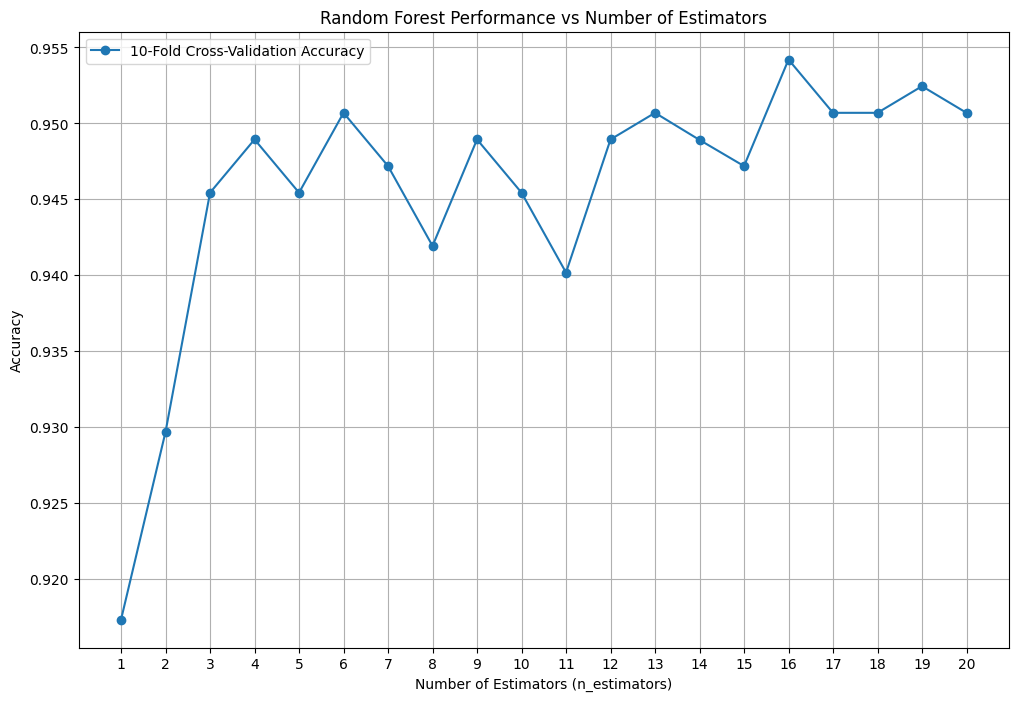

Random Forest CV Scores: [np.float64(0.9172932330827068), np.float64(0.9296679197994988), np.float64(0.9454260651629072), np.float64(0.9489348370927317), np.float64(0.9454260651629072), np.float64(0.950689223057644), np.float64(0.9471804511278193), np.float64(0.9419172932330826), np.float64(0.9489348370927319), np.float64(0.9454260651629072), np.float64(0.9401629072681704), np.float64(0.9489348370927317), np.float64(0.950689223057644), np.float64(0.9489035087719297), np.float64(0.9471804511278196), np.float64(0.9541979949874687), np.float64(0.950689223057644), np.float64(0.950689223057644), np.float64(0.9524436090225563), np.float64(0.950689223057644)]
Best n_estimators: 16 with accuracy: 0.9542


In [5]:
# Question 3a: Random Forest with varying n_estimators
# Use best max_depth from 2(b)ii which is 5
best_depth_q2 = 5
n_estimators_range = range(1, 21)
rf_cv_scores = []

for n_est in n_estimators_range:
    # Create random forest classifier
    rf_clf = ensemble.RandomForestClassifier(
        n_estimators=n_est, 
        max_depth=best_depth_q2, 
        random_state=RANDOM_STATE
    )
    
    # 10-fold cross-validation accuracy
    cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
    scores = cross_val_score(rf_clf, X, y, cv=cv)
    rf_cv_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=FIGSIZE)
plt.plot(n_estimators_range, rf_cv_scores, marker='o', label='10-Fold Cross-Validation Accuracy')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.xticks(n_estimators_range)
plt.show()

print("Random Forest CV Scores:", rf_cv_scores)
print(f"Best n_estimators: {n_estimators_range[np.argmax(rf_cv_scores)]} with accuracy: {max(rf_cv_scores):.4f}")

### (b) 
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:** Yes, there is an improvement when using random forests with multiple trees compared to a single tree (n_estimators=1). The accuracy increases as we add more trees to the ensemble.

### (c) 
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:** n_estimators = 16

### (d) 
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

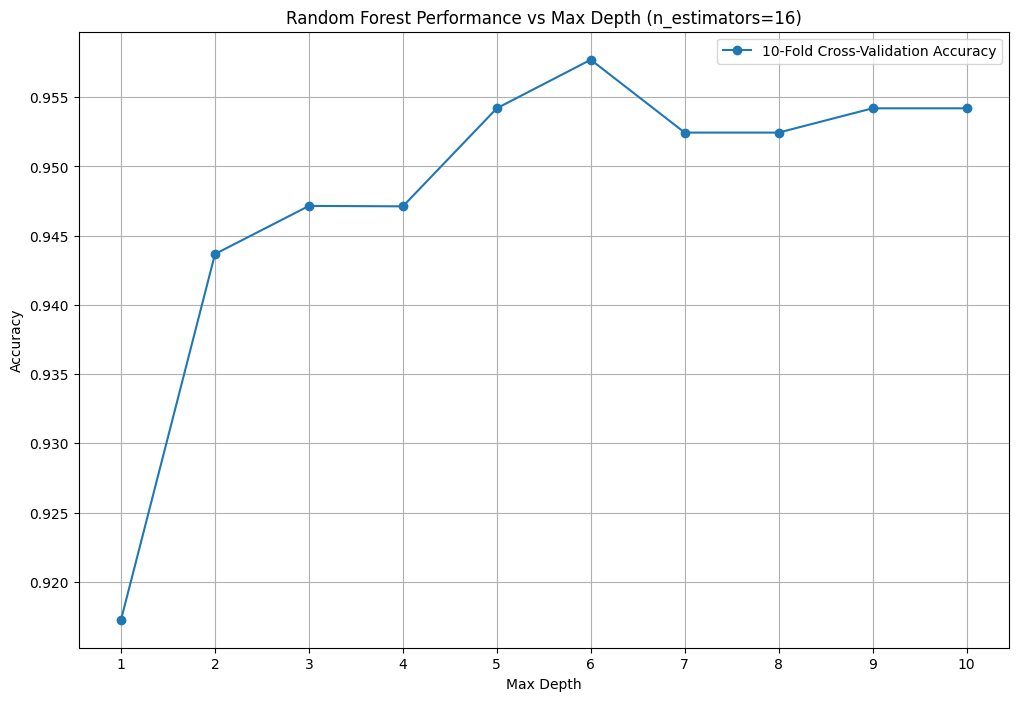

Random Forest CV Scores (by depth): [np.float64(0.9172619047619046), np.float64(0.9436716791979951), np.float64(0.9471491228070177), np.float64(0.9471177944862156), np.float64(0.9541979949874687), np.float64(0.9577067669172932), np.float64(0.9524436090225563), np.float64(0.9524436090225563), np.float64(0.9541979949874685), np.float64(0.9541979949874685)]
Best max_depth: 6 with accuracy: 0.9577


In [6]:
# Question 3d: Random Forest with varying max_depth
# Use best n_estimators from 3c which is 16
best_n_estimators = 16
max_depths_rf = range(1, 11)
rf_depth_cv_scores = []

for depth in max_depths_rf:
    # Create random forest classifier
    rf_clf = ensemble.RandomForestClassifier(
        n_estimators=best_n_estimators, 
        max_depth=depth, 
        random_state=RANDOM_STATE
    )
    
    # 10-fold cross-validation accuracy
    cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
    scores = cross_val_score(rf_clf, X, y, cv=cv)
    rf_depth_cv_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depths_rf, rf_depth_cv_scores, marker='o', label='10-Fold Cross-Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title(f'Random Forest Performance vs Max Depth (n_estimators={best_n_estimators})')
plt.legend()
plt.grid(True)
plt.xticks(max_depths_rf)
plt.show()

print("Random Forest CV Scores (by depth):", rf_depth_cv_scores)
print(f"Best max_depth: {max_depths_rf[np.argmax(rf_depth_cv_scores)]} with accuracy: {max(rf_depth_cv_scores):.4f}")

### (e) 
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:** No, the optimal setting is different. The new optimal max_depth for random forest is 6, while the optimal max_depth for a single decision tree was 5.

## 4\. 
For this last question, we will explore the dependability of our estimates. 
### (a) 
Make a plot using the following procedure:
#### i. 
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii. 
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

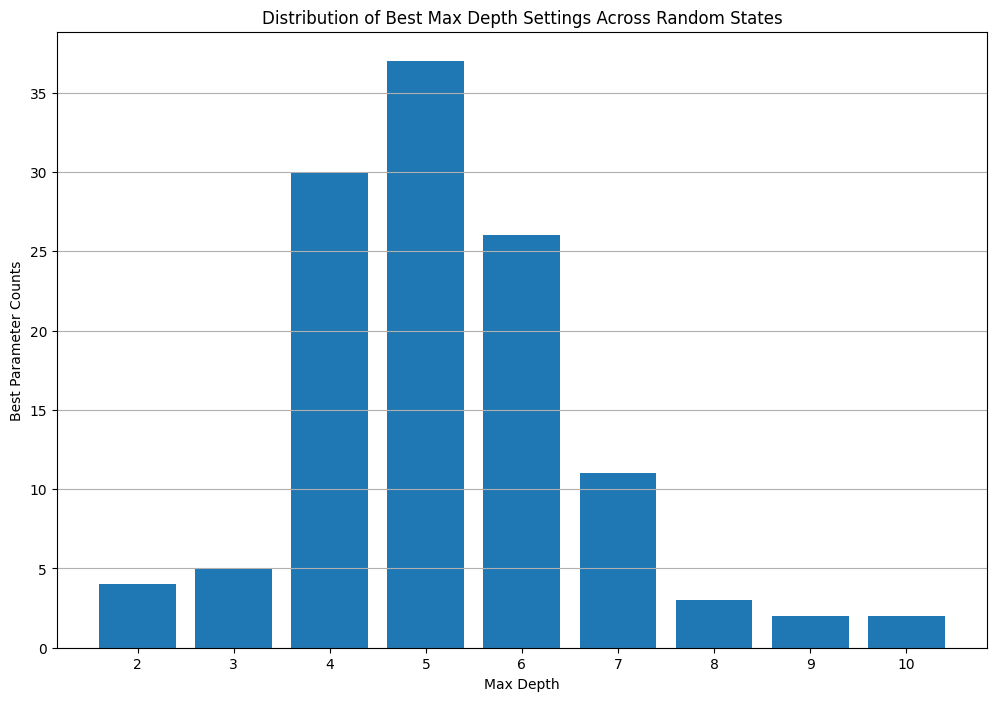

Best depth counts:
{2: 4, 3: 5, 4: 30, 5: 37, 6: 26, 7: 11, 8: 3, 9: 2, 10: 2}


In [7]:
# Question 4a: Explore best max_depth across different random states
random_states = range(100)
max_depths_q4 = range(1, 11)
best_depth_counts = defaultdict(int)

for rs in random_states:
    depth_scores = []
    
    for depth in max_depths_q4:
        # Create decision tree classifier
        clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=rs)
        
        # 10-fold cross-validation accuracy
        cv = KFold(n_splits=10, shuffle=True, random_state=rs)
        scores = cross_val_score(clf, X, y, cv=cv)
        depth_scores.append(scores.mean())
    
    # Find the best depth(s) for this random state
    max_score = max(depth_scores)
    best_depths = [depth for depth, score in zip(max_depths_q4, depth_scores) 
                   if score == max_score]
    
    # Count each best depth
    for best_depth in best_depths:
        best_depth_counts[best_depth] += 1

# Plot the results
plt.figure(figsize=FIGSIZE)
depths = sorted(best_depth_counts.keys())
counts = [best_depth_counts[d] for d in depths]
plt.bar(depths, counts)
plt.xlabel('Max Depth')
plt.ylabel('Best Parameter Counts')
plt.title('Distribution of Best Max Depth Settings Across Random States')
plt.xticks(depths)
plt.grid(True, axis='y')
plt.show()

print("Best depth counts:")
pprint.pprint(dict(sorted(best_depth_counts.items())))

### (b) 
What are the top two most frequent parameter settings?

**Student answer here:** The top two most frequent parameter settings are max_depth = 5 (appeared 37 times) and max_depth = 4 (appeared 30 times).